In [5]:
# !pip install transformers
# !pip install tqdm pandas


In [6]:
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import tqdm
from transformers import pipeline



 
### Token Repetition Rate Metric Explanation

The **Token Repetition Rate** is designed to measure the proportion of repeated tokens in a given text. It is calculated as:

\[
\text{Repetition Rate} = 1 - \frac{\text{Number of Unique Tokens}}{\text{Total Number of Tokens}}
\]


The **Token Repetition Rate** helps identify redundant or low-quality data in a dataset:
- **High repetition rates** (closer to `1`) often suggest redundant or repetitive text.
- **Low repetition rates** (closer to `0`) suggest diverse and unique content.

In [7]:
# Metric 2: Token Repetition Rate
def lexical_diversity(text, tokenizer):
    """
    Compute token repetition rate as the proportion of repeated tokens
    using a multilingual model tokenizer.
    """
    tokens = tokenizer.tokenize(text)
    unique_tokens = set(tokens)
    return (len(unique_tokens) / len(tokens)) if tokens else 0


"""

2-gram, 3-gram, 4-gram
My name is is dipika


my name is dipika, your name is .., his name is...

"""

In [8]:
# Load the dataset
file_path = "data/sampled_aya_all_subsets_15k.parquet"
df = pd.read_parquet(file_path)


In [9]:
df

,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,subset_name,aya_partition
0,303,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nSalari...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated
1,212,Traduci questo testo in genovese:\nL'Europa ap...,La traduzione in genovese del testo è:\nL'Eurö...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,6,ita,train,Latn,templated_ligurian_news_train_sample,templated
2,170,Qual è la traduzione genovese di questo testo?...,La traduzione in genovese del testo è:\nAttent...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,8,ita,train,Latn,templated_ligurian_news_train_sample,templated
3,290,Traduxi in lengua italiaña:\nPapê fäsci in scî...,A traduçion in italian do testo a l’é:\nFalsi ...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,14,lij,train,Latn,templated_ligurian_news_train_sample,templated
4,331,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nRussia...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated
...,...,...,...,...,...,...,...,...,...,...,...,...
15071,151002,Ba mhaith liom tuirse a thabhairt do ghaolta a...,Ba mhaith liom a mholadh dóibh pictiúr greannm...,Aya-Dataset,-,-,0,gle,train,Latn,aya_dataset_train_sample,aya
15072,158437,Ερώτηση: Τι είναι η απάντηση στην αξία της ανά...,Απάντηση: Η ανάγνωση βιβλίων έχει αξία στην εκ...,Aya-Dataset,-,-,0,ita,train,Latn,aya_dataset_train_sample,aya
15073,65556,Haddii aan haysto 5 moos oo aan 2 xabo siiyo q...,Waxaad haysataa 3 moos.,Aya-Dataset,-,-,0,som,train,Latn,aya_dataset_train_sample,aya
15074,122083,Quelle est la capitale du Canada?,La capitale du Canada est Ottawa dans la provi...,Aya-Dataset,-,-,0,fra,train,Latn,aya_dataset_train_sample,aya


In [10]:
df["inputs"][0],df["targets"][0]

('Quæ a l’é a traduçion italiaña de sto testo?\nSaläio minimo, o Governo o l\'arve ma se ne parlià à settembre\nO Governo o l\'arve a-a propòsta de un saläio minimo fissou pe lezze, ma a discuscion a se faià à settembre. A maggioransa a l\'aiva deçiso de no votâ in commiscion l\'emendamento pe scassâ o testo presentou da l\'oppoxiçion, dapeu a l\'à stabilio de piggiâse doî meixi de tempo pe çercâ d\'arrivâ à unna verscion unitäia. A propòsta da minoransa a prevedde unna paga minima de 9 euro à l\'oa da-i 15 de novembre do 2024. Quella de Forza Italia a veu solo che estende i contræti collettivi à chi l\'é descoverto, con l\'applicaçion de quello "ciù in veuga" pe-o settô. I scindicati no son tutti da mæxima: a Cisl, prexempio, a temme che l\'iniçiativa in Parlamento a pòsse levâ da forsa a-a contrattaçion.',
 'A traduçion in italian do testo a l’é:\nSalario minimo, il Governo apre ma se ne parlerà a settembre\nIl Governo apre alla proposta di un salario minimo fissato per legge, ma la 

In [11]:
# Load a multilingual tokenizer
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

# Apply the function to both 'inputs' and 'targets' columns
df['input_token_repetition_rate'] = df['inputs'].apply(lambda text: token_repetition_rate(text, tokenizer))
df['target_token_repetition_rate'] = df['targets'].apply(lambda text: token_repetition_rate(text, tokenizer))


Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors


In [12]:
df

,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,subset_name,aya_partition,input_token_repetition_rate,target_token_repetition_rate
0,303,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nSalari...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.409253,0.282723
1,212,Traduci questo testo in genovese:\nL'Europa ap...,La traduzione in genovese del testo è:\nL'Eurö...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,6,ita,train,Latn,templated_ligurian_news_train_sample,templated,0.351351,0.451713
2,170,Qual è la traduzione genovese di questo testo?...,La traduzione in genovese del testo è:\nAttent...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,8,ita,train,Latn,templated_ligurian_news_train_sample,templated,0.288066,0.445748
3,290,Traduxi in lengua italiaña:\nPapê fäsci in scî...,A traduçion in italian do testo a l’é:\nFalsi ...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,14,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.469945,0.328244
4,331,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nRussia...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.502762,0.354701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,151002,Ba mhaith liom tuirse a thabhairt do ghaolta a...,Ba mhaith liom a mholadh dóibh pictiúr greannm...,Aya-Dataset,-,-,0,gle,train,Latn,aya_dataset_train_sample,aya,0.074074,0.222222
15072,158437,Ερώτηση: Τι είναι η απάντηση στην αξία της ανά...,Απάντηση: Η ανάγνωση βιβλίων έχει αξία στην εκ...,Aya-Dataset,-,-,0,ita,train,Latn,aya_dataset_train_sample,aya,0.000000,0.116279
15073,65556,Haddii aan haysto 5 moos oo aan 2 xabo siiyo q...,Waxaad haysataa 3 moos.,Aya-Dataset,-,-,0,som,train,Latn,aya_dataset_train_sample,aya,0.107143,0.000000
15074,122083,Quelle est la capitale du Canada?,La capitale du Canada est Ottawa dans la provi...,Aya-Dataset,-,-,0,fra,train,Latn,aya_dataset_train_sample,aya,0.000000,0.420455


In [13]:
import pandas as pd

# Define percentiles to calculate
percentiles = [0.9, 0.95, 0.99]

# Calculate descriptive statistics
partition_descriptions = df.groupby("aya_partition")[["target_token_repetition_rate"]].describe()

# Calculate additional percentiles for each partition and metric
additional_percentiles = (
    df.groupby("aya_partition")[["target_token_repetition_rate"]]
    .quantile(percentiles)
    .reset_index()
    .rename(columns={"level_1": "percentile"})
)

# Reshape the additional percentiles for easier interpretation
percentile_table = additional_percentiles.pivot(
    index="aya_partition", columns="percentile", values=["target_token_repetition_rate"]
)

# Combine descriptive statistics and percentiles into one table
stats_table = pd.concat(
    [partition_descriptions, percentile_table],
    axis=1,
)
stats_table


target_token_repetition_rate                                \
                                     count      mean       std  min  25%   
aya_partition                                                              
aya                                 5000.0  0.206961  0.220618  0.0  0.0   
templated                           5060.0  0.174174  0.199170  0.0  0.0   
translated                          5016.0  0.166804  0.188492  0.0  0.0   

                                                                           
                    50%       75%       max       0.9      0.95      0.99  
aya_partition                                                              
aya            0.142857  0.338983  0.977180  0.531727  0.689619  0.802147  
templated      0.104322  0.281250  0.976831  0.482359  0.576966  0.771929  
translated     0.118644  0.278689  0.992736  0.424684  0.517561  0.782037

In [14]:
import pandas as pd

# Define percentiles to calculate
percentiles = [0.9, 0.95, 0.99]

# Calculate descriptive statistics
partition_descriptions = df.groupby("aya_partition")[["input_token_repetition_rate"]].describe()

# Calculate additional percentiles for each partition and metric
additional_percentiles = (
    df.groupby("aya_partition")[["input_token_repetition_rate"]]
    .quantile(percentiles)
    .reset_index()
    .rename(columns={"level_1": "percentile"})
)

# Reshape the additional percentiles for easier interpretation
percentile_table = additional_percentiles.pivot(
    index="aya_partition", columns="percentile", values=["input_token_repetition_rate"]
)

# Combine descriptive statistics and percentiles into one table
stats_table = pd.concat(
    [partition_descriptions, percentile_table],
    axis=1,
)
stats_table


input_token_repetition_rate                                     \
                                    count      mean       std  min       25%   
aya_partition                                                                  
aya                                5000.0  0.099260  0.138344  0.0  0.000000   
templated                          5060.0  0.219170  0.199276  0.0  0.058824   
translated                         5016.0  0.257774  0.209358  0.0  0.081633   

                                                                           
                    50%       75%       max       0.9      0.95      0.99  
aya_partition                                                              
aya            0.041667  0.152868  0.725756  0.315789  0.403367  0.561411  
templated      0.144928  0.376372  0.931126  0.510836  0.575909  0.768257  
translated     0.209677  0.413043  0.994604  0.541158  0.626570  0.851988

/tmp/ipykernel_92020/269967473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_92020/269967473.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


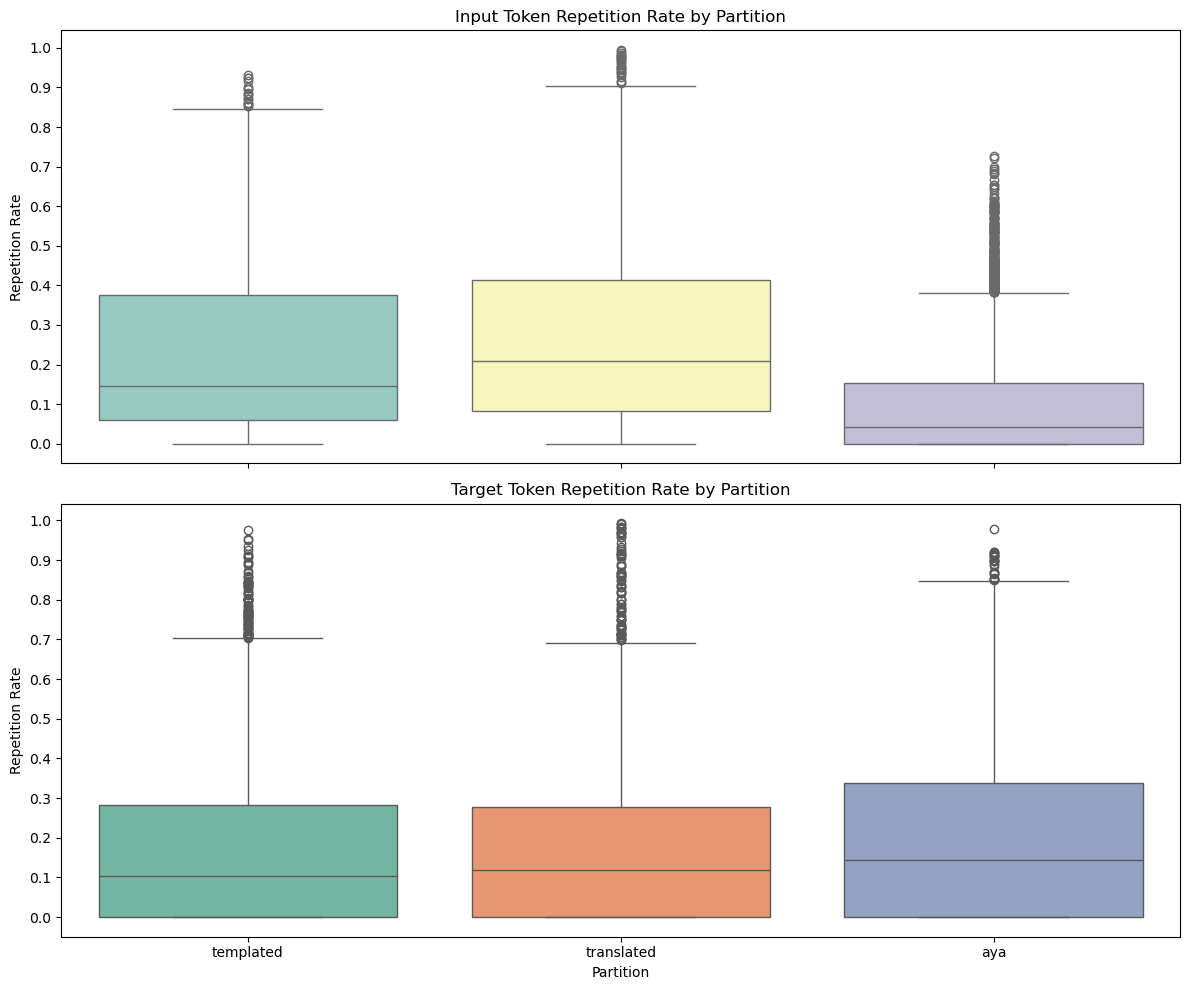

Boxplot saved as: token_repetition_rate_boxplots.png


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for boxplots with more granular y-axis ticks
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot input_token_repetition_rate boxplot
sns.boxplot(
    data=df,
    x="aya_partition",
    y="input_token_repetition_rate",
    palette="Set3",
    ax=axs[0]
)
axs[0].set_title("Input Token Repetition Rate by Partition")
axs[0].set_ylabel("Repetition Rate")
axs[0].set_yticks([i * 0.1 for i in range(11)])  # Set y-axis ticks

# Plot target_token_repetition_rate boxplot
sns.boxplot(
    data=df,
    x="aya_partition",
    y="target_token_repetition_rate",
    palette="Set2",
    ax=axs[1]
)
axs[1].set_title("Target Token Repetition Rate by Partition")
axs[1].set_ylabel("Repetition Rate")
axs[1].set_xlabel("Partition")
axs[1].set_yticks([i * 0.1 for i in range(11)])  # Set y-axis ticks

# Adjust layout and save the plot
plt.tight_layout()
output_boxplot_path = "token_repetition_rate_boxplots.png"
plt.savefig(output_boxplot_path, format="png", dpi=300)
plt.show()

print(f"Boxplot saved as: {output_boxplot_path}")


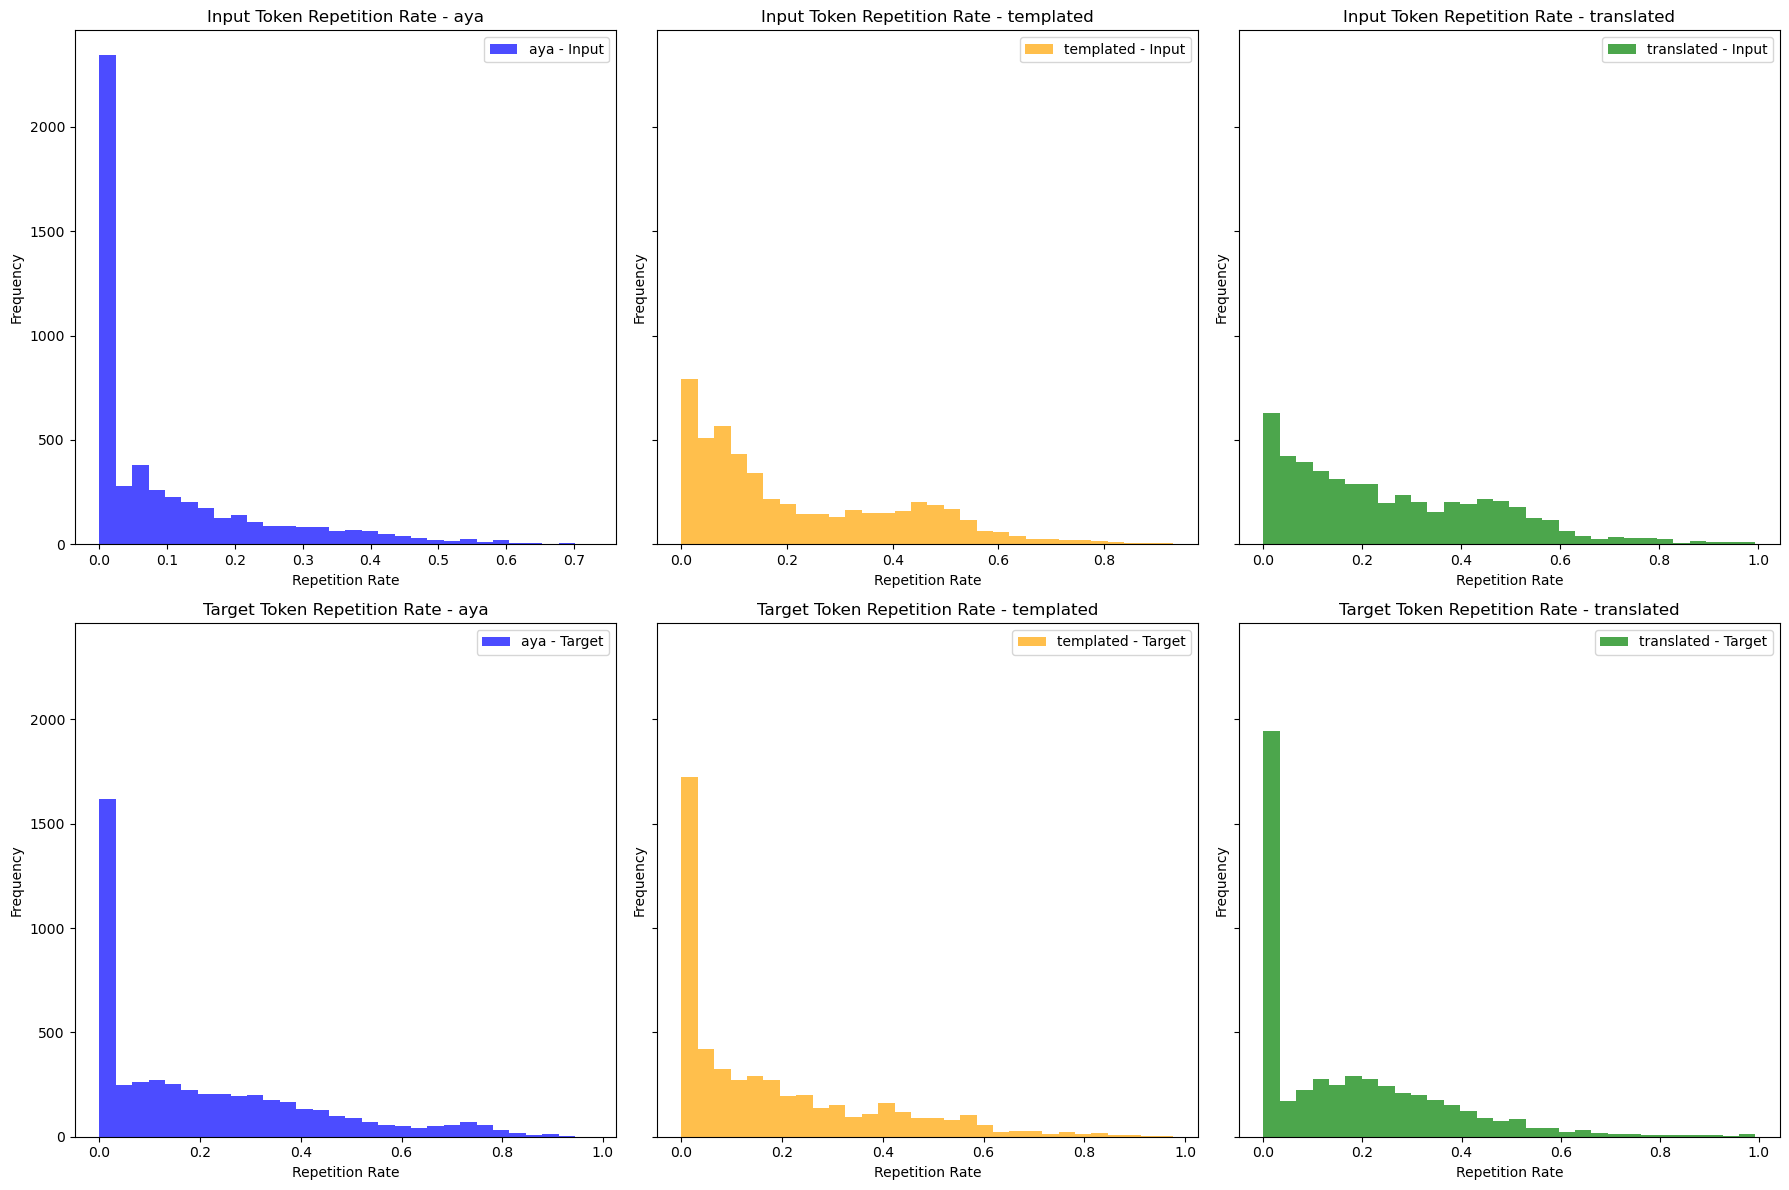

Plot saved as: token_repetition_rate_histograms.png


In [16]:

# Prepare subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)

# Define the partitions and the data
partitions = ['aya', 'templated', 'translated']
colors = ['blue', 'orange', 'green']

# Plot input token repetition rate histograms for each partition
for i, partition in enumerate(partitions):
    axes[0, i].hist(
        df[df['aya_partition'] == partition]['input_token_repetition_rate'],
        bins=30, alpha=0.7, color=colors[i], label=f"{partition} - Input"
    )
    axes[0, i].set_title(f"Input Token Repetition Rate - {partition}")
    axes[0, i].set_xlabel("Repetition Rate")
    axes[0, i].set_ylabel("Frequency")
    axes[0, i].legend()

# Plot target token repetition rate histograms for each partition
for i, partition in enumerate(partitions):
    axes[1, i].hist(
        df[df['aya_partition'] == partition]['target_token_repetition_rate'],
        bins=30, alpha=0.7, color=colors[i], label=f"{partition} - Target"
    )
    axes[1, i].set_title(f"Target Token Repetition Rate - {partition}")
    axes[1, i].set_xlabel("Repetition Rate")
    axes[1, i].set_ylabel("Frequency")
    axes[1, i].legend()

# Adjust layout for better display
plt.tight_layout()
plt.show()

# Save the plot as a PNG file
output_path = "token_repetition_rate_histograms.png"

fig.savefig(output_path, format="png", dpi=300)
print(f"Plot saved as: {output_path}")



In [17]:
df

,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,subset_name,aya_partition,input_token_repetition_rate,target_token_repetition_rate
0,303,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nSalari...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.409253,0.282723
1,212,Traduci questo testo in genovese:\nL'Europa ap...,La traduzione in genovese del testo è:\nL'Eurö...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,6,ita,train,Latn,templated_ligurian_news_train_sample,templated,0.351351,0.451713
2,170,Qual è la traduzione genovese di questo testo?...,La traduzione in genovese del testo è:\nAttent...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,8,ita,train,Latn,templated_ligurian_news_train_sample,templated,0.288066,0.445748
3,290,Traduxi in lengua italiaña:\nPapê fäsci in scî...,A traduçion in italian do testo a l’é:\nFalsi ...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,14,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.469945,0.328244
4,331,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nRussia...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.502762,0.354701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,151002,Ba mhaith liom tuirse a thabhairt do ghaolta a...,Ba mhaith liom a mholadh dóibh pictiúr greannm...,Aya-Dataset,-,-,0,gle,train,Latn,aya_dataset_train_sample,aya,0.074074,0.222222
15072,158437,Ερώτηση: Τι είναι η απάντηση στην αξία της ανά...,Απάντηση: Η ανάγνωση βιβλίων έχει αξία στην εκ...,Aya-Dataset,-,-,0,ita,train,Latn,aya_dataset_train_sample,aya,0.000000,0.116279
15073,65556,Haddii aan haysto 5 moos oo aan 2 xabo siiyo q...,Waxaad haysataa 3 moos.,Aya-Dataset,-,-,0,som,train,Latn,aya_dataset_train_sample,aya,0.107143,0.000000
15074,122083,Quelle est la capitale du Canada?,La capitale du Canada est Ottawa dans la provi...,Aya-Dataset,-,-,0,fra,train,Latn,aya_dataset_train_sample,aya,0.000000,0.420455


In [18]:
df['target_token_repetition_rate'].describe()

count    15076.000000
mean         0.182596
std          0.203901
min          0.000000
25%          0.000000
50%          0.122200
75%          0.300489
max          0.992736
Name: target_token_repetition_rate, dtype: float64

In [19]:
!pip install sentencepiece


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [20]:
import pandas as pd

def define_thresholds(df, col, low_percentile=0.25, high_percentile=0.90):
    """
    Define thresholds for a column based on percentiles.
    """
    return {
        'low': df[col].quantile(low_percentile),
        'high': df[col].quantile(high_percentile)
    }

def categorize_rate(rate, thresholds):
    """
    Categorize a repetition rate as low, medium, or high based on thresholds.
    """
    if rate < thresholds['low']:
        return 'low'
    elif rate > thresholds['high']:
        return 'high'
    else:
        return 'medium'

def categorize_column(df, col, thresholds):
    """
    Add a category column for repetition rates based on thresholds.
    """
    category_col = f"{col}_category"
    df[category_col] = df[col].apply(lambda x: categorize_rate(x, thresholds))
    return df, category_col

def sample_by_category(df, category_col, category, num_samples=3, random_state=42):
    """
    Sample a number of rows from a specific category.
    """
    if category in df[category_col].values:
        return df[df[category_col] == category].sample(num_samples, random_state=random_state)
    else:
        return pd.DataFrame()  # Return empty DataFrame if no examples in category

def display_samples_by_partition(df, partition_col, col, num_samples=3, low_percentile=0.25, high_percentile=0.90):
    """
    Display examples from each partition categorized by a specific column.
    """
    partitions = df[partition_col].unique()
    # translator = pipeline("translation", model="Helsinki-NLP/opus-mt-mul-en")

    for partition in partitions:
        print(f"\n*********** Partition: {partition.upper()} ===")
        partition_df = df[df[partition_col] == partition]
        
        # Define thresholds and categorize
        thresholds = define_thresholds(partition_df, col, low_percentile, high_percentile)
        partition_df, category_col = categorize_column(partition_df, col, thresholds)
        
        # Sample and display examples for each category
        for category in ['high']:
            samples = sample_by_category(partition_df, category_col, category, num_samples)
            if not samples.empty:
                print(f"\n--- {category.upper()} ({col}) ---")
                for idx, row in samples.iterrows():
                    print(f"\nExample {idx + 1} ({row[col]:.4f}), subset: {row['subset_name']} :")
                    print(f"Target: {row['targets']}")
                    # translation = translator(row['targets'], max_length=512)[0]['translation_text']
                    print("-" * 40)
            else:
                print(f"No examples found in {category.upper()} category for {partition}.")

                
# Example usage
display_samples_by_partition(
    df=df,
    partition_col='aya_partition',
    col='target_token_repetition_rate',
    num_samples=3,
    low_percentile=0.25,
    high_percentile=0.95
)



*********** Partition: TEMPLATED ===

--- HIGH (target_token_repetition_rate) ---

Example 3205 (0.8672), subset: templated_hindi_headline_train_sample :
करीब 30 लोग लगभग 20 मिनट तक रेत पर औंधे मुंह लेटे रहे। इनमें से कुछ ने उसी रंग के कपड़े पहन रखे थे, जो आयलान ने पहने हुए थे। हुआ और मैं भावुक हो गई। इसने मुझे बक्र परिवार के उन बच्चों की याद दिला दी, जो पिछले युद्ध में गाजा तट पर मारे गए थे। इस बीच भूमध्यसागर के दूसरी ओर कल रबात तट पर दर्जनों लोगों ने आयलान को श्रद्धांजलि दी। वे उसी प्रकार समुद्र तट पर लेटे, जिस तरह आयलान का शव मिला था।    
करीब 30 लोग लगभग 20 मिनट तक रेत पर औंधे मुंह लेटे रहे। इनमें से कुछ ने उसी रंग के कपड़े पहन रखे थे, जो आयलान ने पहने हुए थे। हुआ और मैं भावुक हो गई। इसने मुझे बक्र परिवार के उन बच्चों की याद दिला दी, जो पिछले युद्ध में गाजा तट पर मारे गए थे। इस बीच भूमध्यसागर के दूसरी ओर कल रबात तट पर दर्जनों लोगों ने आयलान को श्रद्धांजलि दी। वे उसी प्रकार समुद्र तट पर लेटे, जिस तरह आयलान का शव मिला था।    
करीब 30 लोग लगभग 20 मिनट तक रेत पर औंधे मुंह लेटे रहे। इन

/tmp/ipykernel_92020/1321313164.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category_col] = df[col].apply(lambda x: categorize_rate(x, thresholds))
/tmp/ipykernel_92020/1321313164.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category_col] = df[col].apply(lambda x: categorize_rate(x, thresholds))
/tmp/ipykernel_92020/1321313164.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [21]:
import pandas as pd

# Define the desired order
desired_order = ['aya_dataset', 'templated_afriqa', 'templated_afrisenti', 'templated_amharic_qa', 'templated_armenian_instruct', 'templated_bengali_news', 'templated_dutch_imdb', 'templated_hindi_headline', 'templated_hindi_news', 'templated_indic_paraphrase', 'templated_indic_sentiment', 'templated_indo_stories', 'templated_japanese_instruct', 'templated_joke_explaination', 'templated_ligurian_news', 'templated_masakhanews', 'templated_mintaka', 'templated_ntx_llm', 'templated_nusax_senti', 'templated_persian_farstail', 'templated_persian_instruct', 'templated_scirepeval', 'templated_seed_instruct', 'templated_soda', 'templated_tamil_stories', 'templated_tamil_thirukkural', 'templated_telugu_food', 'templated_telugu_jokes', 'templated_telugu_news', 'templated_telugu_poems', 'templated_telugu_riddles', 'templated_thai_pos', 'templated_thai_scb', 'templated_thai_usembassy', 'templated_thai_wikitionary', 'templated_turku_paraphrase', 'templated_ukranian_gec', 'templated_uner_llm', 'templated_urdu_news_category', 'templated_urdu_news_gen', 'templated_urdu_news_headline', 'templated_wiki_split', 'templated_xcsqa', 'templated_xlel_wd', 'templated_xwikis', 'translated_adversarial_qa', 'translated_cnn_dailymail', 'translated_dolly', 'translated_flan_coqa', 'translated_flan_cot', 'translated_flan_gem_wiki', 'translated_flan_lambada', 'translated_flan_qa', 'translated_hotpotqa', 'translated_joke_explaination', 'translated_mintaka', 'translated_mlqa', 'translated_nqopen', 'translated_paws', 'translated_piqa', 'translated_soda', 'translated_wiki_split', 'translated_wikiqa', 'translated_xlel_wd']


# Step 1: Compute metrics for each subset
metrics = df.groupby("subset_name").agg(
    avg_target_token_repetition_rate=("target_token_repetition_rate", "mean"),
    p50_target_token_repetition_rate=("target_token_repetition_rate", "median"),
    p90_target_token_repetition_rate=("target_token_repetition_rate", lambda x: x.quantile(0.9)),
    p99_target_token_repetition_rate=("target_token_repetition_rate", lambda x: x.quantile(0.99))
).reset_index()

# Step 2: Remove suffix from `subset_name` for ordering
# Remove everything including the second-to-last underscore
metrics["subset_base"] = metrics["subset_name"].apply(
    lambda x: "_".join(x.split("_")[:-2])
)

# Display the updated `subset_base` column for verification
metrics[["subset_name", "subset_base"]]
# Debugging: Check which entries in `subset_base` do not match `desired_order`
missing_in_order = set(metrics["subset_base"]) - set(desired_order)
missing_in_metrics = set(desired_order) - set(metrics["subset_base"])

print("Entries in `subset_base` not in `desired_order`:", missing_in_order)
print("Entries in `desired_order` not in `subset_base`:", missing_in_metrics)

# Step 3: Add a categorical column to enforce order
metrics["subset_order"] = pd.Categorical(metrics["subset_base"], categories=desired_order, ordered=True)

# Step 4: Sort the metrics dataframe based on the desired order
metrics_sorted = metrics.sort_values("subset_order").drop(columns=["subset_base", "subset_order"])

# Display the sorted metrics
metrics_sorted


Entries in `subset_base` not in `desired_order`: set()
Entries in `desired_order` not in `subset_base`: set()


,subset_name,avg_target_token_repetition_rate,p50_target_token_repetition_rate,p90_target_token_repetition_rate,p99_target_token_repetition_rate
0,aya_dataset_train_sample,0.206961,0.142857,0.531727,0.802147
1,templated_afriqa_train_sample,0.020838,0.000000,0.000000,0.379000
2,templated_afrisenti_train_sample,0.000000,0.000000,0.000000,0.000000
3,templated_amharic_qa_train_sample,0.092388,0.083333,0.166667,0.235586
4,templated_armenian_instruct_train_sample,0.078391,0.066667,0.155832,0.215636
...,...,...,...,...,...
59,translated_piqa_train_sample,0.143041,0.100000,0.343507,0.933093
60,translated_soda_train_sample,0.232188,0.212444,0.391667,0.621371
61,translated_wiki_split_train_sample,0.195970,0.159832,0.346927,0.913864
62,translated_wikiqa_train_sample,0.027036,0.000000,0.083333,0.331750


In [22]:
output_path = 'target_token_repetition_rate_stats.csv'
target_stats.to_csv(output_path, index=False)

NameError: name 'target_stats' is not defined

### Language Identification

### Language Identification

In [25]:
import fasttext
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)
model.predict("Igbesẹ yii lo mu ki ileeṣẹ ọlọpaa gbe igbimọ kan dide, ti wọn si paṣẹ pe ki ọkunrin naa lọọ rọọkun nile titi ti wọn yoo fi par")


(('__label__yor_Latn',), array([1.00000906]))

In [29]:
import fasttext
from huggingface_hub import hf_hub_download
import pandas as pd

# Load the FastText language identification model
model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)

# Define a function to predict language for each text
def predict_language(text):
    # try:
    # Predict the language and confidence score
    cleaned_text = text.replace("\n", " ").strip()
    label, confidence = model.predict(cleaned_text, k=1)
    return label[0], confidence[0]
    # except Exception as e:
    #     return "Error", 0.0  # Handle any prediction errors gracefully

# Apply the function to the `targets` column
df["fasttext_language"], df["fasttext_confidence"] = zip(*df["targets"].apply(predict_language))



In [50]:
set(df["subset_name"])

{'aya_dataset_train_sample',
 'templated_afriqa_train_sample',
 'templated_afrisenti_train_sample',
 'templated_amharic_qa_train_sample',
 'templated_armenian_instruct_train_sample',
 'templated_bengali_news_train_sample',
 'templated_dutch_imdb_train_sample',
 'templated_hindi_headline_train_sample',
 'templated_hindi_news_train_sample',
 'templated_indic_paraphrase_train_sample',
 'templated_indic_sentiment_train_sample',
 'templated_indo_stories_train_sample',
 'templated_japanese_instruct_train_sample',
 'templated_joke_explaination_train_sample',
 'templated_ligurian_news_train_sample',
 'templated_masakhanews_train_sample',
 'templated_mintaka_train_sample',
 'templated_ntx_llm_train_sample',
 'templated_nusax_senti_train_sample',
 'templated_persian_farstail_train_sample',
 'templated_persian_instruct_train_sample',
 'templated_scirepeval_val_sample',
 'templated_seed_instruct_train_sample',
 'templated_soda_train_sample',
 'templated_tamil_stories_train_sample',
 'templated_tam

In [56]:
"""

"""
# df["targets"][0]
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["targets"])[0]

"The Ligurian (Genoese) translation is:\nIn Giamaica, o maiezzo comme instituçion o l'é sostituio de spesso con unna riga de compagni, perché e dònne pövie no peuan fâ confiansa in sce di contributi finançiäi regolari inte un ambiente d'instabilitæ econòmica."

In [61]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["inputs"])[0]

'Translate from English to Genoese:\nIn Jamaica, marriage as an institution is often substituted for a series of partners, as poor women cannot rely on regular financial contributions in a climate of economic instability.'

In [57]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["language"])[0]

'eng'

In [60]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["inputs"])[2]

"Traduxi in ingleise:\nO sente defæti che l'idea de çentro exemplare a l'é uña de træ descoverte ciù importante de l'antropologia linguistica."

In [59]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["targets"])[2]

"A traduçion in ingleise do testo a l’é:\nHe feels, in fact, that the exemplary center idea is one of linguistic anthropology's three most important findings."

In [58]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["language"])[2]

'lij'

In [62]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["inputs"])[4]

'Translate to Ligurian:\nThis could potentially benefit mothers who cannot produce breast milk but want their children to have breast milk rather than formula.'

In [75]:
# translated_jokes["language"]

In [76]:
translated_jokes = df[df["subset_name"]=="translated_joke_explaination_train_sample"]
translated_jokes_hi = translated_jokes[translated_jokes["language"] == "hin"]

In [77]:
translated_jokes_hi

,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,subset_name,aya_partition,input_token_repetition_rate,target_token_repetition_rate,fasttext_language,fasttext_confidence,fasttext_language_code,language_match
6930,13063,प्रश्न: हैम्बर्गर हमेशा क्यों हार जाता है? A: ...,स्पष्टीकरणः केचप टमाटर से बना एक मोटा तरल पदार...,Joke-explaination-inst (T),-,generation,1,hin,train,Deva,translated_joke_explaination_train_sample,translated,0.170732,0.336634,__label__hin_Deva,0.999407,hin,True


In [80]:
list(translated_jokes_hi["targets"])[0]

'स्पष्टीकरणः केचप टमाटर से बना एक मोटा तरल पदार्थ है; केचप टमाटर से बनाया जाता है। बहुत से लोग अपने हैम्बर्गर पर केचप डालते हैं। \'पहुंचने\' का अर्थ है अपने से आगे के व्यक्ति के समान स्थान पर पहुंचना। "केचप" "पकड़ना" जैसा लगता है और यदि आप पकड़ नहीं सकते हैं तो आप दौड़ नहीं जीत सकते हैं! बेवकूफ मजाक!'

In [31]:
import pandas as pd

# Step 1: Extract the language codes from the `fasttext_language` column
df['fasttext_language_code'] = df['fasttext_language'].str.replace("__label__", "").str.split("_").str[0]

# Step 2: Compare fasttext language with the expected language
df['language_match'] = df['language'] == df['fasttext_language_code']

# Step 3: Summarize results
summary = {
    "Total Samples": len(df),
    "Matched Languages": df['language_match'].sum(),
    "Mismatched Languages": (~df['language_match']).sum(),
    "Match Percentage": (df['language_match'].mean() * 100),
    "Average Confidence (Mismatch)": df.loc[~df['language_match'], 'fasttext_confidence'].mean()
}

summary

{'Total Samples': 15076,
 'Matched Languages': 12032,
 'Mismatched Languages': 3044,
 'Match Percentage': 79.80896789599363,
 'Average Confidence (Mismatch)': 0.7533083517623285}

In [36]:
# set(df['fasttext_language_code'])

In [34]:
# Step 1: Extract the language codes from the `fasttext_language` column
df['fasttext_language_code'] = df['fasttext_language'].str.replace("__label__", "").str.split("_").str[0]

# Step 2: Compare fasttext language with the expected language
df['language_match'] = df['language'] == df['fasttext_language_code']

# Step 3: Group by subsets and calculate mismatch percentage
subset_mismatch_summary = (
    df.groupby('subset_name')
    .agg(
        total_samples=('language_match', 'count'),
        mismatched_samples=('language_match', lambda x: (~x).sum()),
        mismatch_percentage=('language_match', lambda x: (~x).mean() * 100),
        average_confidence_mismatched=('fasttext_confidence', lambda x: x[~df['language_match']].mean())
    )
    .reset_index()
)


# Display the summary
print("Language Mismatch Summary:")
subset_mismatch_summary.head(50)


Language Mismatch Summary:


,subset_name,total_samples,mismatched_samples,mismatch_percentage,average_confidence_mismatched
0,aya_dataset_train_sample,5000,684,13.680000,0.711115
1,templated_afriqa_train_sample,115,75,65.217391,0.601376
2,templated_afrisenti_train_sample,115,115,100.000000,0.997977
3,templated_amharic_qa_train_sample,115,0,0.000000,NaN
4,templated_armenian_instruct_train_sample,115,0,0.000000,NaN
5,templated_bengali_news_train_sample,115,0,0.000000,NaN
6,templated_dutch_imdb_train_sample,115,0,0.000000,NaN
7,templated_hindi_headline_train_sample,115,0,0.000000,NaN
8,templated_hindi_news_train_sample,115,0,0.000000,NaN
9,templated_indic_paraphrase_train_sample,115,0,0.000000,NaN


In [ ]:
# Step 4: Save the enriched DataFrame and summary
df.to_csv("language_comparison_results.csv", index=False)

# Convert the summary to a DataFrame for saving
summary_df = pd.DataFrame([summary])
summary_df.to_excel("language_comparison_summary.xlsx", index=False)

# Print the summary
print("Language Comparison Summary:")
print(summary)

# Print a sample of mismatched rows for review
print("\nSample Mismatched Rows:")
print(df[~df['language_match']][['targets', 'language', 'fasttext_language_code', 'fasttext_confidence']].head())


In [ ]:
# Display the dataframe with new columns
print(df.head())

# Save the results to a CSV or Excel file for further analysis
df.to_csv("language_predictions.csv", index=False)
print("Language predictions saved to 'language_predictions.csv'.")
